In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from fastai.vision.all import *
from ipywidgets import widgets

import requests
from io import BytesIO


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# train set
path = Path('/kaggle/input/pnevmoniya/train')
fls = get_image_files(path)

# check corrupted images (while downloading)
failed = verify_images(path)
print("Failed to verify:", failed)

# create data blocks for data loaders
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

# data loader
dls = transports.dataloaders(path)


'PosixPath' object is not iterable
Failed to verify: []


In [3]:
# Train
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 105MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.468896,0.191613,0.940556,01:57


epoch,train_loss,valid_loss,accuracy,time
0,0.160122,0.097408,0.966443,01:50
1,0.084160,0.068147,0.980825,01:50
2,0.061586,0.059676,0.977948,01:51
3,0.041460,0.038850,0.988495,01:51
4,0.025043,0.040739,0.986577,01:49


**VIZUAL TAHLIL**

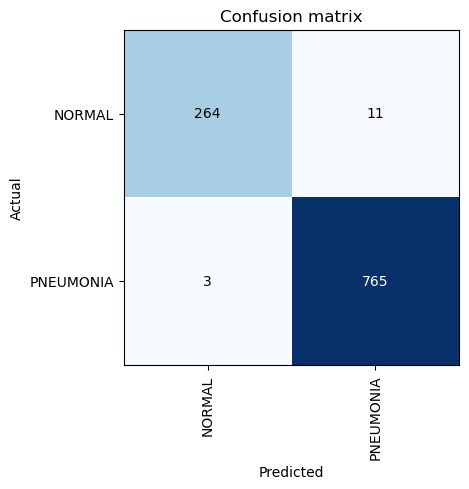

In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


**STATISTIK TAHLIL**

In [5]:
interp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.99      0.96      0.97       275
   PNEUMONIA       0.99      1.00      0.99       768

    accuracy                           0.99      1043
   macro avg       0.99      0.98      0.98      1043
weighted avg       0.99      0.99      0.99      1043



**MODELNI SAQLASH**

In [6]:
#saqlash
learn.export('pneumonia_model.pkl')

In [7]:
sub = pd.read_csv("/kaggle/input/pnevmoniya/sample_solution.csv")
sub

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [8]:
for x in range(len(sub)):
    label = sub.loc[x, 'id']
    img = PILImage.create(Path(f"/kaggle/input/pnevmoniya/test/{label}"))
    pred, pred_id, probs = learn.predict(img)
    sub.loc[x, 'labels'] = np.array(probs[1])


In [9]:
# sub['labels'].replace({'PNEUMONIA': 1, 'NORMAL': 0}, inplace=True)
sub.to_csv('submission_resnet34.csv', index=False)

In [10]:
pd.read_csv("/kaggle/working/submission_resnet34.csv")

,id,labels
0,test_img_10001.jpeg,0.999990
1,test_img_10002.jpeg,0.011171
2,test_img_10003.jpeg,0.992626
3,test_img_10004.jpeg,0.999899
4,test_img_10005.jpeg,0.000037
...,...,...
619,test_img_10620.jpeg,0.999171
620,test_img_10621.jpeg,0.000561
621,test_img_10622.jpeg,0.999961
622,test_img_10623.jpeg,0.998451
